In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

import sys
sys.path.append('..')
from student_utils import adjacency_matrix_to_graph
from solver_utils import parse_input
from visualize import plot_graph

%matplotlib inline

## Plot Inputs

In [2]:
# Path to input
input_path = '../phase1/200.in'

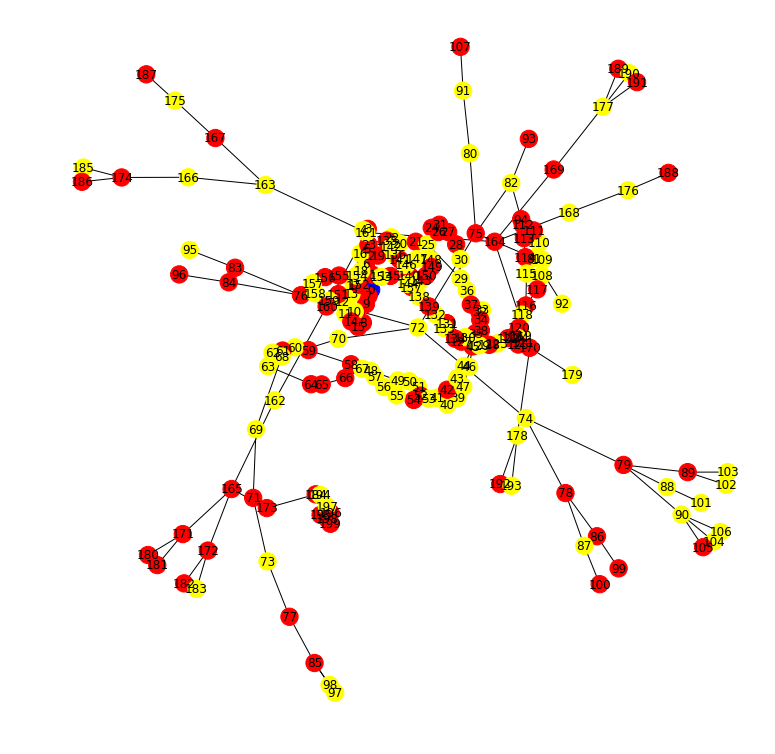

In [3]:
plot_graph(input_path, show_labels=True)

## Generate Test Inputs

In [26]:
from phase1.generate_graphs import (
    create_random_graph,
    create_branching_graph,
    create_cycle_graph,
    create_diamond_graph)
from phase1.subgraph import join_subgraphs
from generate_inputs import select_houses
import random
import os
from generate_inputs import write_input_to_file
from student_utils import is_metric

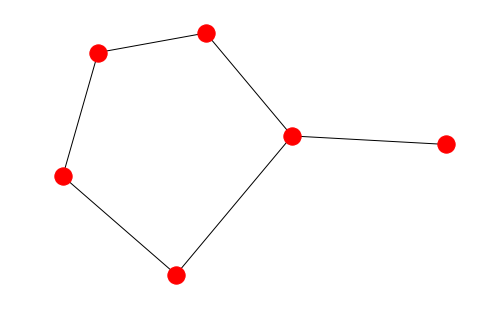

In [48]:
# G = create_branching_graph(20, 3, .5)
G = create_random_graph(6, sparsity=0.8)
nx.draw(G._G)
H = select_houses(G._G, 3)
source = 0
# fp = './test_inputs/branching_20v_10h.in'
fp = './test_inputs/random_6v_3h_1.in'
write_input_to_file(fp, G._G, H, source)

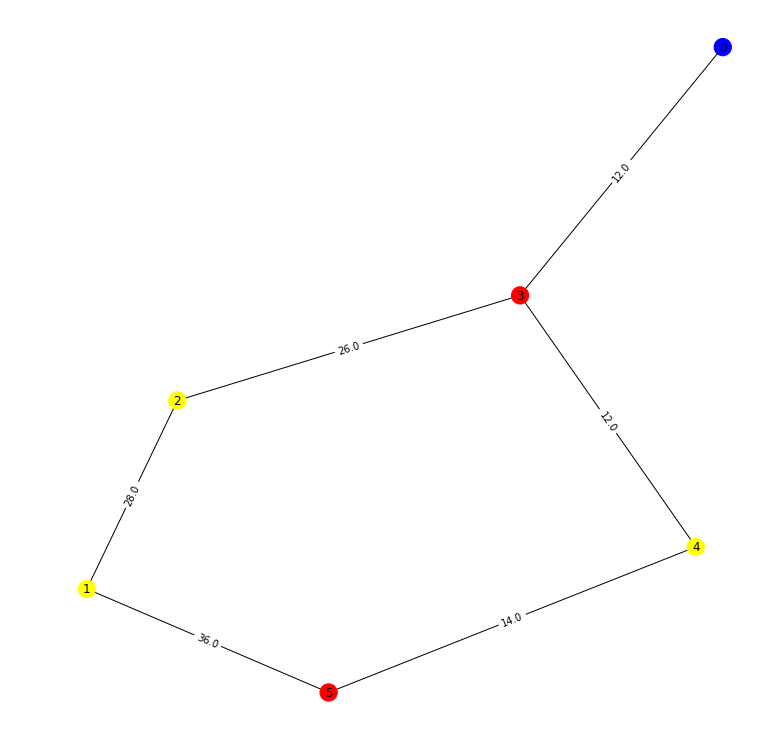

In [50]:
plot_graph('./test_inputs/random_6v_3h_1.in', show_labels=True, show_edge_weights=True)

## Plot All Inputs

In [ ]:
import glob
paths = [path for path in glob.iglob('./inputs/*_50.in')]

def get_team_number(x):
    return int(x.split('/')[-1].split('_')[0])

paths = sorted(paths, key=get_team_number)
n_entries = len(paths)

In [ ]:
import math
n_columns = np.sqrt(n_entries)
n_rows = math.ceil(n_entries / n_columns) + 1
plt.figure(figsize=(100, 100))
for i, input_path in enumerate(paths[:20]):
    plt.subplot(n_rows, n_columns, i+1)
    plt.axis('off')
    plt.title(f'{get_team_number(input_path)}', fontsize=30)
    
    try:
        num_locations, num_houses, location_names, house_names, source, adj = parse_input(input_path)
        G, _ = adjacency_matrix_to_graph(adj)
        pos = nx.spring_layout(G)
        house_names = set(house_names)
        colormap = [
            ('yellow' if location_names[i] in house_names else 'red')
            for i in range(num_locations)
        ]
        source_index = location_names.index(source)
        colormap[source_index] = 'blue'
        nx.draw(G, node_color=colormap, with_labels=True, pos=pos)
    except:
        pass

blue_patch = mpatches.Patch(color='red', label='Source')
red_patch = mpatches.Patch(color='red', label='Location')
yellow_patch = mpatches.Patch(color='yellow', label='TA Home')
black_line = Line2D([0], [0], color='black', lw=4, label='Road')

plt.legend(handles=[red_patch, yellow_patch, black_line], loc='lower right', fontsize=30, bbox_to_anchor=(0, -1))
plt.show()